In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("homeprices_banglore.csv")
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [42]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [44]:
scaled_y = sy.fit_transform( df['price'].values.reshape(df.shape[0],1) )
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [40]:
### some examples of small fn's
### np.ones returns ones with given shape
a = np.ones(5,dtype=int) 
print('single arr with 5 ones',a)
b = np.ones([4,2], dtype=int)
print('4 by 2 arr with ones', b)
b.shape[0]

np.ones(shape=(2))

single arr with 5 ones [1 1 1 1 1]
4 by 2 arr with ones [[1 1]
 [1 1]
 [1 1]
 [1 1]]


array([1., 1.])

In [45]:
def batch_gradient_descent( x , y_true , epochs , learning_rate = 0.1 ):
    number_of_features = x.shape[1] ## gives no.of.columns (ie . 2)
    weight = np.ones(shape=(number_of_features)) ### w = [1,1] 
    bias = 0
    total_samples = x.shape[0]  ### no. of records / rows

    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(weight, scaled_x.T) + bias  ### exactly our ML model - pls refer the note - w1 * area + w2 * bedrooms

        ### since we know 
        ### w1 = w1 - learning rate * d/dw1
        ### w2 = w2 - learning rate * d/dw2
        ### bias = bias - learning rate * d/dw2

        ## so , firstly we need to find the derivatives part

        weight_derivative = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        bias_derivative = -(2/total_samples)*np.sum(y_true-y_predicted)
                                                                                                                                                                                                            
        weight = weight - learning_rate * weight_derivative
        bias = bias - learning_rate * bias_derivative

        cost = np.mean(np.square(y_true-y_predicted))

        if i % 10==0:  ### for each 10 , 20 , 30 th iterations i need to record these points to plot as graphs
            cost_list.append(cost)
            epoch_list.append(i)
    return weight , bias , cost , cost_list , epoch_list

weight , bias , cost , cost_list , epoch_list = batch_gradient_descent( scaled_x , scaled_y.reshape(scaled_y.shape[0],),500)
weight , bias , cost


(array([0.75550442, 0.41573953]),
 np.float64(-0.11682769564715854),
 np.float64(0.0034268126227234427))

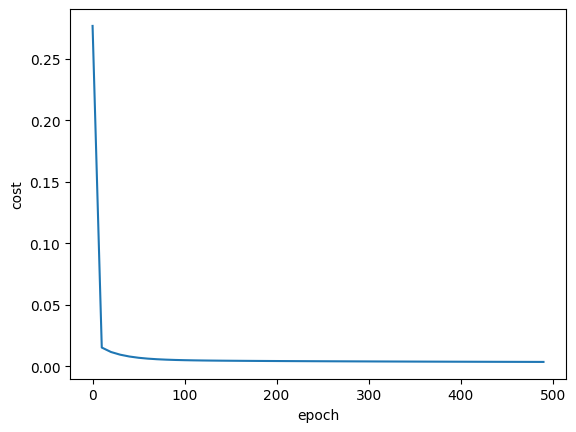

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list , cost_list)

In [ ]:
#### as we can see cost funtion is initially high , but decreases as epoch value increases .

In [14]:
#### now we need to implement prediction fn.
### but before that , we see uses of some small  functions .

In [15]:
sx ## x axis data --> area , bedrooms
sx.transform([[2600,4]]) ## this fn will transform area , bedroom values b/w 0 & 1 .

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [17]:
weight  ### weights ie w1 , w2 .

array([0.75550442, 0.41573953])

In [22]:
sy ### y axis data i.e price
## 1 is the max price
## 0.5 is median price
## 0 is the min price
# inverse transform will transform 0 --> 1 decimal values with actual price .
sy.inverse_transform([[1,0.5,0]]) 

array([[167. ,  99.5,  32. ]])

In [31]:
### Let's create the predict function now :

def predict( area , bedroom , weight , bias):
    scaled_x = sx.transform([[area,bedroom]])[0]

    scaled_price = weight[0] * scaled_x[0] + weight[1] * scaled_x[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]
    

In [32]:
predict(2600,4,weight,bias)

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(121.6279485426776)

In [33]:
predict(1000,2,weight,bias)

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(37.293476976103996)